In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Assignment_1_dataset_50Startups.xlsx')
data = data.replace(0, np.nan)
print(data.isnull().sum())
print(data['State'].value_counts())
data.dropna(inplace=True)
print("\n\nAfter dropping the na rows\n\n")
print(data.isnull().sum())
data['State'].value_counts()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64
New York      17
California    17
Florida       16
Name: State, dtype: int64


After dropping the na rows


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


Florida       16
California    15
New York      15
Name: State, dtype: int64

In [3]:
data.head()
x = data[['R&D Spend', 'Administration', 'Marketing Spend','State']]
y = data['Profit']

x = pd.get_dummies(x, columns=['State'], prefix = ['State'])
x.insert(0,'Bias',1)

numeric_feilds = ['R&D Spend', 'Administration', 'Marketing Spend']
mu = x.mean()
sigma = x.std()
for i in numeric_feilds:
    x.loc[:,i] = ((x[i] - mu[i]) / sigma[i])
x = x.drop(['State_New York'], axis = 1)
x

,Bias,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,1,1.993518,0.557598,2.186081,0,0
1,1,1.930548,1.097632,1.935619,1,0
2,1,1.721002,-0.775806,1.612599,0,1
3,1,1.513449,-0.122151,1.390436,0,0
4,1,1.461611,-1.139579,1.237466,0,1
5,1,1.227480,-0.825440,1.207762,0,0
6,1,1.290154,0.941784,-0.904251,1,0
7,1,1.191349,0.879544,0.857611,0,1
8,1,0.968085,0.998476,0.747464,0,0
9,1,1.031990,-0.494834,0.687900,1,0


In [4]:
def ridge_get_cost(x, y, theta, lamb):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) + lamb * np.matmul(theta.T,theta))[0][0] / (2 * m)

print(x.shape[1])
y = np.array(y).reshape(y.shape[0], 1)
theta = np.zeros(shape=(6, 1))
lamb = 0.05
ridge_get_cost(x, y, theta, lamb)

6


7484486563.788014

In [5]:
def ridge_gradient_descend(x, y, alpha, lamb, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        theta1 = theta
        theta1[0] = 0
        grad = (np.matmul(x.T, e) + lamb * theta1) / m 
        theta = theta - alpha * grad
        
        cost.append(ridge_get_cost(x, y, theta, lamb))
        
    return cost, theta

In [6]:
alpha = 0.01
iterations = 2000
cost3, theta3 = ridge_gradient_descend(x, y, 0.01, 0.05, theta, iterations)
cost4, theta4 = ridge_gradient_descend(x, y, 0.005, 0.05, theta, iterations)


2235844894.6480293


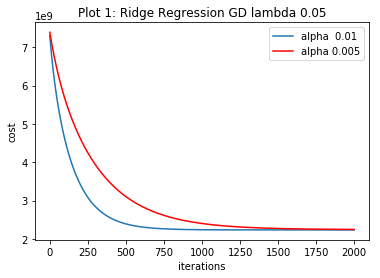

In [7]:
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 1: Ridge Regression GD lambda 0.05")
plt.plot(cost3, label='alpha  0.01')
plt.plot(cost4, 'r', label='alpha 0.005')
plt.legend()

print(cost3[-1])

In [8]:
h3 = np.matmul(x, theta3)
h4 = np.matmul(x, theta4)

data.insert(5,'RGD0.01',h3)
data.insert(6,'RGD0.005',h4)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,RGD0.01,RGD0.005
0,165349.20,136897.80,471784.10,New York,192261.83,78039.534804,77893.390020
1,162597.70,151377.59,443898.53,California,191792.06,193655.565810,189466.713221
2,153441.51,101145.55,407934.54,Florida,191050.39,179526.209744,175386.635904
3,144372.41,118671.85,383199.62,New York,182901.99,57343.281635,56810.819404
4,142107.34,91391.77,366168.42,Florida,166187.94,168573.077562,164276.660474


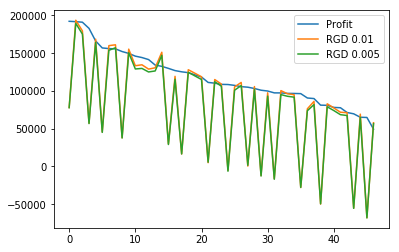

In [9]:
plt.plot(data['Profit'],label='Profit')
plt.plot(data['RGD0.01'],label='RGD 0.01')
plt.plot(data['RGD0.005'],label='RGD 0.005')
plt.legend()